# Análise de Impactos de isolamento social em animais durante a pandemia

- Avaliar a correlação entre a quantidade de pessoas na casa e a adoção de animais na pandemia

- T-student para comparar falta de apetite e apetite exagerado

- T-student comparando animais quietos e inquietos

- ANOVA(fator único) entre múltiplos grupos

- Fazer teste de Turkey para verificar quais desses grupos tem mais significância

<hr>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()

from scipy.stats import norm
from scipy.stats import t as t_student
from statsmodels.stats.weightstats import ttest_ind, ztest

In [5]:
df = pd.read_csv('dados2.csv', encoding='utf8', sep=';')
df.head()

,Idade,Escolaridade,Gênero,Quantas pessoas moram na casa ?,Durante a pandemia de COVID-19 o número de indivíduos residindo em sua casa aumentou?,Quantos animais você já possuía antes da pandemia de Covid-19? [Gatos],Quantos animais você já possuía antes da pandemia de Covid-19? [Cães],Quantos animais você adquiriu durante a pandemia de Covid-19? [Gatos],Quantos animais você adquiriu durante a pandemia de Covid-19? [Cães],"Caso você tenha adquirido algum animal durante a pandemia de Covid-19, foi realizado alguma adaptação na sua casa para inserir o novo animal ?",...,"Em uma escala de 1 à 10 avalie se o pelo do seu animal começou a cair mais durante a pandemia de Covid-19, onde 1 representa pouco ou nenhuma queda de pelo e 10 representa muita queda de pelo.","Em uma escala de 1 à 10 avalie se seu animal começou a lamber o corpo ou se morder de maneira exacerbada durante a pandemia de Covid-19, onde 1 representa pouca lambedura/mordedura e 10 representa muita lambedura/mordedura.","Em uma escala de 1 à 10 avalie se seu animal começou a se coçar de maneira exagerada durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma coceira e 10 representa muita coceira.","Em uma escala de 1 à 10 avalie se seu animal passou a se automutilar (machucar a si próprio)? durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma automutilação e 10 representa alto nível de automutilação .","Em uma escala de 1 à 10 avalie se seu animal passou a arranhar/morder objetos durante a pandemia de Covid-19, onde 1 representa pouca ou nenhuma arranhadura/mordida e 10 representa exacerbada arranhadura/mordida.","Em uma escala de 1 à 10 avalie se seu animal mostra-se mais cansado ( muito tempo deitado, dormia muito...)durante a pandemia de Covid-19, onde 1 representa pouco ou nenhum cansaço e 10 representa muito cansado.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 demonstra-se mais agressivo, onde 1 representa pouca ou nenhuma agressividade e 10 representa muita agressividade.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 demonstra-se mais carente, onde 1 representa pouco carente e 10 representa muito carente.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 passou a demonstrar falta de apetite, onde 1 representa pouca ou nenhuma falta de apetite e 10 representa muita falta de apetite.","Em uma escala de 1 à 10 avalie se seu animal durante a pandemia de Covid-19 passou a apresentar apetite exagerado, onde 1 representa pouca ou nenhum apetite exagerado e 10 representa muito apetite exagerado."
0,18 a 25 anos,Ensino superior incompleto,Feminino,3,Não,2,0,1,0,Não,...,1,1,1,2,2,1,2,8,1,10
1,26 a 30 anos,Ensino superior completo,Feminino,3,Não,0,2,0,1,Sim,...,8,1,1,1,4,2,1,5,1,1
2,18 a 25 anos,Ensino superior incompleto,Feminino,4,Não,0,4,1,0,Sim,...,4,1,6,2,2,1,1,1,2,2
3,18 a 25 anos,Ensino superior incompleto,Feminino,6,Não,5,5,0,0,Não se aplica,...,5,7,4,1,2,2,1,5,1,5
4,26 a 30 anos,Pós-graduação,Masculino,2,Não,1,0,1,0,Não,...,1,1,1,1,5,5,1,1,1,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantas pessoas moram na casa ?,116.0,3.094828,1.395511,1.0,2.00,3.0,4.00,7.0
Quantos animais você já possuía antes da pandemia de Covid-19? [Gatos],116.0,1.112069,1.586747,0.0,0.00,0.0,2.00,6.0
Quantos animais você já possuía antes da pandemia de Covid-19? [Cães],116.0,0.974138,1.066984,0.0,0.00,1.0,1.00,5.0
Quantos animais você adquiriu durante a pandemia de Covid-19? [Gatos],116.0,0.491379,1.107254,0.0,0.00,0.0,1.00,6.0
Quantos animais você adquiriu durante a pandemia de Covid-19? [Cães],116.0,0.181034,0.468098,0.0,0.00,0.0,0.00,3.0
"Em uma escala de 1 à 10 onde 1 representa pouca mudança e 10 representa grande mudança, avalie se a rotina de seu animal mudou DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 (passeios, frequência da alimentação, horário da alimentação, brincadeiras por exemplo)?",116.0,4.689655,2.751802,1.0,2.75,5.0,7.00,10.0
"Em uma escala de 1 à 10 avalie se DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 seu animal demonstrou-se mais INQUIETO, onde 1 representa pouco inquieto e 10 representa muito inquieto.",116.0,4.534483,2.808159,1.0,2.00,4.0,7.00,10.0
"Em uma escala de 1 à 10 avalie DURANTE A QUARENTENA DA PANDEMIA DE COVID-19 seu animal tem se demonstrado mais QUIETO, onde 1 representa pouco quieto e 10 representa muito quieto.",116.0,4.258621,2.628012,1.0,2.00,4.0,6.00,10.0
"Em uma escala de 1 à 10 avalie se você notou alteração no comportamento do seu animal DURANTE A QUARENTENA DA PANDEMIA DE COVID-19, onde 1 representa poucas alterações e 10 representa muitas alterações.",116.0,3.887931,2.643356,1.0,1.00,4.0,6.00,10.0
"Em uma escala de 1 à 10 avalie se com a pandemia de Covid-19 você NOTOU TRISTEZA no seu animal (o animal se isola, chora), onde 1 representa pouca ou nenhuma tristeza e 10 representa muita tristeza.",116.0,3.008621,2.390182,1.0,1.00,2.0,4.00,10.0


In [ ]:
anl1 = df.rename(columns={
    df.columns[3]: 'num_pessoas',
    df.columns[7]: 'gatos',
    df.columns[8]: 'cachorros'
})
anl1.drop(anl1.columns.difference(['num_pessoas','gatos', 'cachorros']), 1, inplace=True)


In [23]:
anl1

,num_pessoas,gatos,cachorros,animal
0,3,1,0,1
1,3,0,1,1
2,4,1,0,1
3,6,0,0,0
4,2,1,0,1
...,...,...,...,...
111,1,1,0,1
112,2,1,0,1
113,2,1,0,1
114,1,1,0,1


In [22]:
anl1['animal'] = anl1['gatos'] + anl1['cachorros']
anl1.corr(method='pearson')

,num_pessoas,gatos,cachorros,animal
num_pessoas,1.000000,0.211568,0.199790,0.263797
gatos,0.211568,1.000000,0.095312,0.927021
cachorros,0.199790,0.095312,1.000000,0.461657
animal,0.263797,0.927021,0.461657,1.000000


<AxesSubplot:>

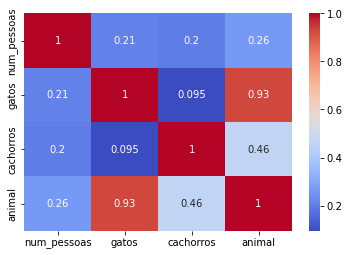

In [30]:
sns.heatmap(anl1.corr(method='pearson'), annot=True, cmap='coolwarm')

Interpretação: pelo baixo número de correlação não dá para afirmar que pessoas que moram sozinhas adotaram mais animais.
- Para gatos, a correlação de Pearson deu 0,21
- Para cães, a correlação de Pearson deu 0,19
- Para ambos, a correlação deu 0,26

Pelo gráfico do excel, pessoas que moram em residência com 5 membros adotaram mais animais durante o período da pandemia.

In [29]:
anl1.num_pessoas.value_counts()

2    32
3    29
4    23
1    13
5    12
6     6
7     1
Name: num_pessoas, dtype: int64

## T-Student

In [39]:
fa = df.columns[28]
ae = df.columns[29]

In [40]:
falta_apetite = df[fa]
apetite_exagerado = df[ae]

In [56]:
falta_apetite.name = 'Falta de Apetite'
apetite_exagerado.name = 'Apetite Exagerado'

In [42]:
ttest_ind(falta_apetite, apetite_exagerado, alternative='two-sided')

(-5.011819353948068, 1.0756422327568345e-06, 230.0)

<AxesSubplot:xlabel='Falta de Apetite', ylabel='Count'>

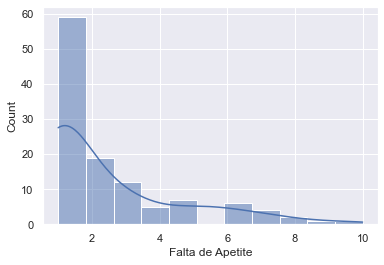

In [57]:
sns.histplot(falta_apetite, kde=True)

<AxesSubplot:xlabel='Apetite Exagerado', ylabel='Count'>

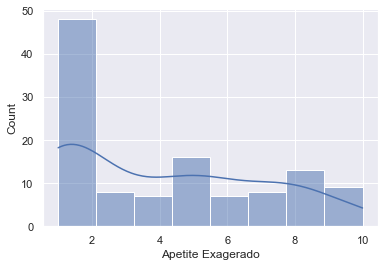

In [58]:
sns.histplot(apetite_exagerado, kde=True)

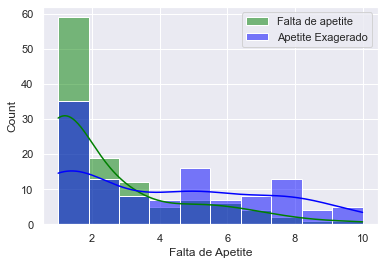

In [63]:


sns.histplot(falta_apetite, color="green", label="Falta de apetite", kde=True, bins=10)
sns.histplot(apetite_exagerado, color="blue", label="Apetite Exagerado", kde=True, bins=10)

plt.legend() 
plt.show()

Interpretação: Pelo teste T, é rejeitada a hipótese nula de que as duas distribuições apresentam a mesma média, pois seu valor P foi de $1.075\cdot 10^{-6}$. Ou seja, houve diferenças significativas entre os animais que tiveram falta de apetite e apetite exagerado durante o isolamento.